# Data Description
### The data consists of 5 columns:

- ### **Variance:** variance of Wavelet Transformed image (continuous)
- ### **Skewness:** skewness of Wavelet Transformed image (continuous)
- ### **Curtosis:** curtosis of Wavelet Transformed image (continuous)
- ### **Entropy:** entropy of image (continuous)
- ### **Class:** class (integer)
### Where class indicates whether or not a Bank Note was authentic.

### 1. Importing libraries

In [56]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler

### 2. Read dataset

In [2]:
df = pd.read_csv('BankNote_Authentication.csv')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


## 3. Data Preprocessing

In [3]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
df.isnull().any()

variance    False
skewness    False
curtosis    False
entropy     False
class       False
dtype: bool

- ### 3.1 Feature Selection

In [5]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

- ### 3.2 Feature Scaling

In [6]:
x = StandardScaler().fit_transform(x)
x

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

- ### 3.3 Split Data into train, test sets

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)
print('X train: ', xtrain.shape)
print('X test:  ', xtest.shape)
print('Y train: ', ytrain.shape)
print('Y test:  ', ytest.shape)

X train:  (1097, 4)
X test:   (275, 4)
Y train:  (1097,)
Y test:   (275,)


### 4. Initializing the ANN

In [8]:
model = tf.keras.models.Sequential()

### 5. ANN Layers

In [9]:
model.add(tf.keras.layers.Dense(64, activation='relu'))                         # 1st hidden layer
model.add(tf.keras.layers.Dense(32, activation='relu'))                         # 2nd hidden layer
model.add(tf.keras.layers.Dense(16, activation='relu'))                         # 3rd hidden layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))                       # output layer

### 6. Training the ANN using SGD optimizer

In [10]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2)

history = model.fit(xtrain, ytrain, batch_size=16, epochs=10000, callbacks=callback)
model.summary()

Epoch 1/10000
69/69 [==============================] - 3s 3ms/step - loss: 0.6704 - accuracy: 0.5971
Epoch 2/10000
69/69 [==============================] - 0s 3ms/step - loss: 0.6292 - accuracy: 0.7912
Epoch 3/10000
69/69 [==============================] - 0s 3ms/step - loss: 0.5866 - accuracy: 0.8286
Epoch 4/10000
69/69 [==============================] - 0s 4ms/step - loss: 0.5342 - accuracy: 0.8496
Epoch 5/10000
69/69 [==============================] - 0s 4ms/step - loss: 0.4707 - accuracy: 0.8687
Epoch 6/10000
69/69 [==============================] - 0s 3ms/step - loss: 0.3989 - accuracy: 0.8879
Epoch 7/10000
69/69 [==============================] - 0s 3ms/step - loss: 0.3286 - accuracy: 0.9088
Epoch 8/10000
69/69 [==============================] - 0s 2ms/step - loss: 0.2648 - accuracy: 0.9216
Epoch 9/10000
69/69 [==============================] - 0s 3ms/step - loss: 0.2090 - accuracy: 0.9426
Epoch 10/10000
69/69 [==============================] - 0s 3ms/step - loss: 0.1642 - accura

### Final weight and bias values

In [42]:
w, b = model.layers[3].get_weights()

In [46]:
print('Weights:\n', w)

Weights:
 [[ 0.9576036 ]
 [-0.5742209 ]
 [ 0.13567553]
 [-0.39776894]
 [-0.823221  ]
 [ 0.34251755]
 [-0.16831315]
 [ 0.18047865]
 [ 0.20615242]
 [ 0.41796753]
 [-0.08171269]
 [ 0.7576908 ]
 [ 0.5793891 ]
 [-0.07887226]
 [-0.68017596]
 [-0.4558866 ]]


In [53]:
print('Minimum Weight =', w.min())
print('Maximum Weight =', w.max())

Minimum Weight = -0.823221
Maximum Weight = 0.9576036


In [51]:
print('Bias =', b)

Bias = [-0.09892774]


In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

### 7. Make predictions and evaluate the model

In [13]:
ypred = model.predict(xtest)
ypred = (ypred > 0.5)
print(np.concatenate((ypred.reshape(len(ypred),1), ytest.reshape(len(ytest), 1)), 1))

9/9 [==============================] - 0s 2ms/step
[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 

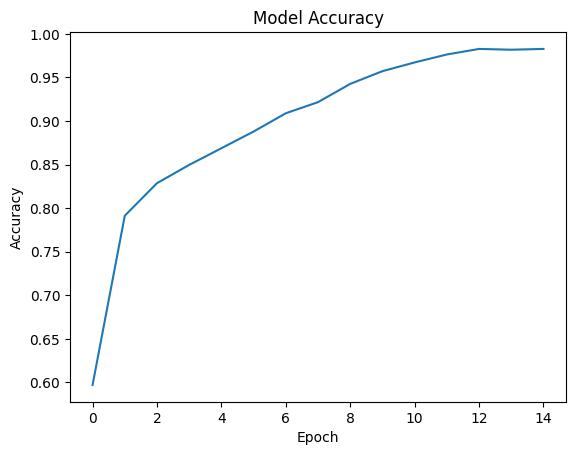

In [16]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

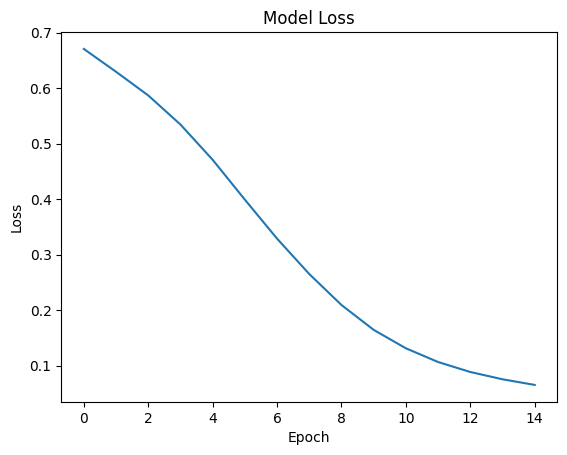

In [17]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### 8. Confusion Matrix

In [14]:
cm = confusion_matrix(ytest, ypred)
print(cm)

[[156   1]
 [  0 118]]


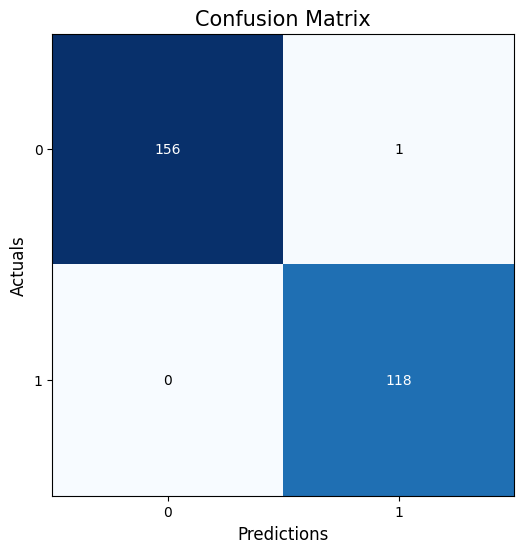

In [66]:
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize = 12)
plt.title('Confusion Matrix', fontsize = 15)
plt.show()